In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import statsmodels.api as sm
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER = "White_noise"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [11]:
num_samples = 100

# 가우시안 분포로 100개 생성
sampleA = np.random.randn(num_samples)
seriesA = pd.Series(sampleA)
sampleB = np.random.randn(num_samples)
seriesB = pd.Series(sampleB)
print("sampleA : \n", sampleA, "\nSeriesA :\n",seriesA)
print("sampleB : \n", sampleB, "\nSeriesB :\n",seriesB)

sampleA : 
 [ 1.80434811e+00 -1.90903792e-01  7.19757942e-01 -1.29327296e+00
 -9.56436377e-01  4.72406278e-01  1.48411603e+00  3.55613349e-01
 -3.13058031e-01 -7.08594577e-04 -1.25040773e+00  6.04515326e-01
  8.82333062e-01 -4.52090333e-01 -4.70042148e-01  2.65878230e-01
 -4.36719736e-01 -6.61326146e-02  2.09972179e+00 -2.47025701e-01
 -3.58340152e-01 -6.47541806e-01  7.44191971e-01 -1.81224173e-01
 -6.49373038e-01  1.32130403e+00  1.41960300e+00 -6.00423566e-01
 -1.86653995e+00  1.00751369e+00 -6.84629826e-01  7.90625599e-01
 -1.97010382e+00  8.92597338e-01 -1.21117193e+00  7.30764119e-01
  1.42730678e-02 -9.53939419e-01 -4.07036313e-01  6.86318457e-01
  1.05894453e-01  5.84412980e-01  1.97644058e+00 -1.56424161e+00
  1.61721257e+00  1.04355938e-01 -8.98784048e-01 -1.33031363e+00
 -1.89120391e-01  9.21650112e-01 -1.27549120e-01  1.51115493e+00
 -1.45117569e+00 -1.20889478e-02 -1.25239344e+00  3.63631883e-01
  8.86887390e-01 -4.20761794e-01 -2.60421386e+00  1.98948147e-01
  4.36738552e

그림 저장: sampleA
그림 저장: sampleB


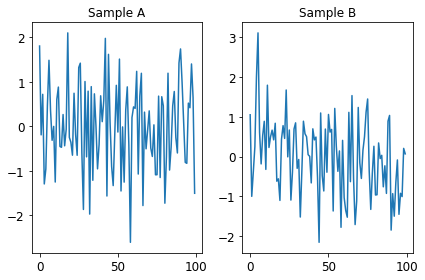

In [12]:
# SampleA와 SampleB의 그래프 출력
plt.subplot(1,2,1)
plt.title("Sample A")
plt.plot(sampleA)
save_fig("sampleA")
plt.subplot(1,2,2)
plt.title("Sample B")
plt.plot(sampleB)
save_fig("sampleB")

그림 저장: Auto Correlation A
그림 저장: Auto Correlation B


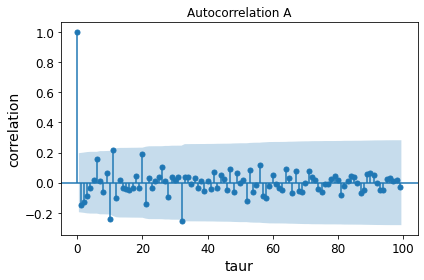

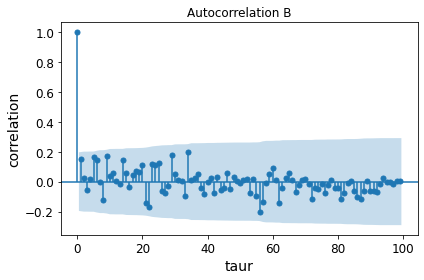

In [13]:
# Auto Correlation A
sm.graphics.tsa.plot_acf(sampleA, lags=num_samples-1)
plt.title("Autocorrelation A")
plt.xlabel("taur")
plt.ylabel("correlation")
save_fig("Auto Correlation A")
# AutoCorrelation B
sm.graphics.tsa.plot_acf(sampleB, lags=num_samples-1)
plt.title("Autocorrelation B")
plt.xlabel("taur")
plt.ylabel("correlation")
save_fig("Auto Correlation B")

In [14]:
autoAvgA=0
autoAvgB=0
for i in range(num_samples-1):
    autoAvgA += seriesA.autocorr(lag=i)
    autoAvgB += seriesB.autocorr(lag=i)
autoAvgA /= num_samples-1
autoAvgB /= num_samples-1
print("AutoCorrelation A : ",autoAvgA)
print("AutoCorrelation B : ",autoAvgB)

AutoCorrelation A :  0.017963720280555092
AutoCorrelation B :  0.05760723906608281


그림 저장: CrossCorrelation
CrossCorrelation :  0.0004370371992583749


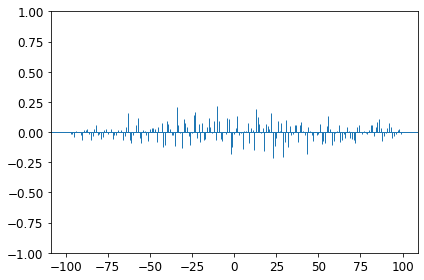

In [15]:
list_crossCorrelation = plt.xcorr(sampleA, sampleB, usevlines=True, maxlags=num_samples-1, normed=True, lw=1)
plt.ylim([-1,1])
crossAvg = 0
crossAvg = np.sum(list_crossCorrelation[1])
crossAvg /= len(list_crossCorrelation)
save_fig("CrossCorrelation")
print("CrossCorrelation : ",crossAvg)
